In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
# define path
input_data_path = '../input/'

In [69]:
# Load in the time series
co2 = pd.read_csv(input_data_path+'co2.csv', 
                 index_col='date', 
                 parse_dates=True)

In [66]:
# Load in the time series
df_mk = pd.read_csv(input_data_path+'milk_production.csv', 
                 index_col='date', 
                 parse_dates=True)

In [3]:
# Load in the time series
df_candy = pd.read_csv(input_data_path+'candy_production.csv', 
                 index_col='date', 
                 parse_dates=True)

In [4]:
# Load in the time series
df_eq = pd.read_csv(input_data_path+'earthquakes.csv', 
                 index_col='date', 
                 parse_dates=True)

In [5]:
# Load in the time series
df_amz = pd.read_csv(input_data_path+'amazon_close.csv', 
                 index_col='date', 
                 parse_dates=True)

In [6]:
df_amz.head()

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26
2019-02-05,1658.81
2019-02-04,1633.31


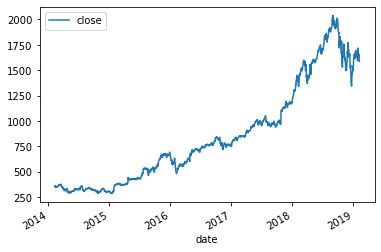

In [7]:
# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
df_amz.plot(ax=ax1)
plt.show()

In [8]:
# Calculate the first difference and drop the nans
amazon_diff = df_amz.diff()
amazon_diff = amazon_diff.dropna()
# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

(-7.203579488811216, 2.33127172548757e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)


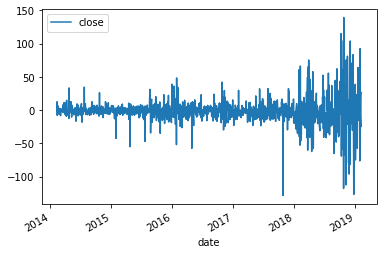

In [9]:
# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
amazon_diff.plot(ax=ax1)
plt.show()

In [10]:
# Calculate log-return and drop nans
amazon_log = np.log(df_amz)
amazon_log = amazon_log.dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

(-0.7739778922526557, 0.8266466281503949, 0, 1258, {'1%': -3.4355588184378574, '5%': -2.8638402312881497, '10%': -2.5679946684494275}, -6249.367882443734)


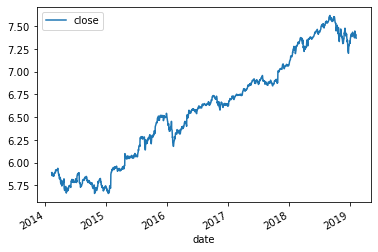

In [11]:
# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
amazon_log.plot(ax=ax1)
plt.show()

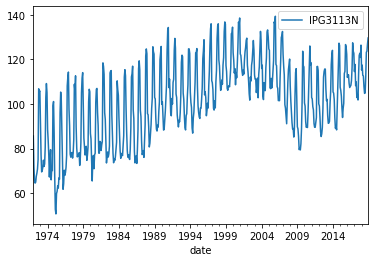

In [12]:
# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
df_candy.plot(ax=ax1)
plt.show()

In [13]:
df_eq.head()

,Year,earthquakes_per_year
date,,
1900-01-01,1900,13.0
1901-01-01,1901,14.0
1902-01-01,1902,8.0
1903-01-01,1903,10.0
1904-01-01,1904,16.0


In [55]:
df_eq = df_eq['earthquakes_per_year']

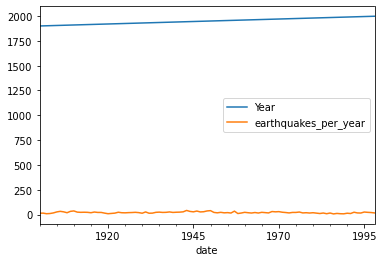

In [14]:
# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
df_eq.plot(ax=ax1)
plt.show()

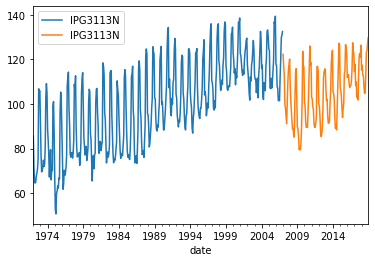

In [15]:
# Split the data into a train and test set
candy_train = df_candy.loc[:'2006']
candy_test = df_candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

In [16]:
result = adfuller(df_eq['earthquakes_per_year'])

In [17]:
# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-3.1831922511917816
0.020978425256003668
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


### Set ar_coefs and ma_coefs for an MA(1) model with MA lag-1 coefficient of -0.7.

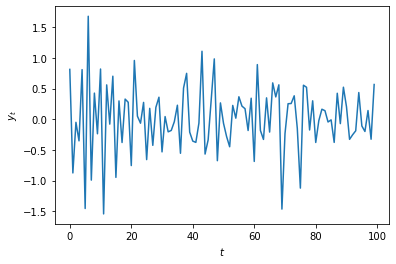

In [18]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(1)

# Set coefficients
ar_coefs = [1]
ma_coefs = [1,-0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

### Set the coefficients for an AR(2) model with AR lag-1 and lag-2 coefficients of 0.3 and 0.2 respectively.

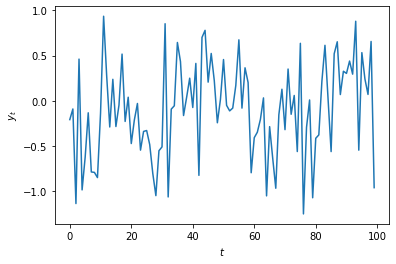

In [19]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(2)

# Set coefficients
ar_coefs = [1,-0.3,-0.2]
ma_coefs = [1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

### Set the coefficients for a model with form .

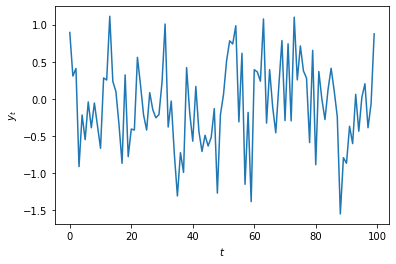

In [20]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(3)

# Set coefficients
ar_coefs = [1,0.2]
ma_coefs = [1,0.3,0.4]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

In [21]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

# Instantiate the model
model = ARMA(y, order=(1,1))

# Fit the model
results = model.fit()

In [22]:
# Instantiate the model
#model = ARMA(sample['timeseries_1'], order=(2,0))

# Fit the model
#results = model.fit()

# Print summary
#print(results)

In [23]:
# Instantiate the model
model = ARMA(df_eq['earthquakes_per_year'], order=(3,1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


                               ARMA Model Results                               
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                       ARMA(3, 1)   Log Likelihood                -315.673
Method:                         css-mle   S.D. of innovations              5.853
Date:                  Wed, 23 Mar 2022   AIC                            643.345
Time:                          09:27:57   BIC                            658.916
Sample:                      01-01-1900   HQIC                           649.645
                           - 01-01-1998                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         19.6452      1.929     10.183      0.000      15.864      23.426
ar.L1.earthquakes_per_year     0.5794      0.416      1.393      0.

### Generating one-step-ahead predictions

In [24]:
df_amz.head()

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26
2019-02-05,1658.81
2019-02-04,1633.31


In [29]:
df_amz=df_amz.reset_index()

In [30]:
df_amz.head()

,date,close
0,2019-02-08,1588.22
1,2019-02-07,1614.37
2,2019-02-06,1640.26
3,2019-02-05,1658.81
4,2019-02-04,1633.31


In [33]:
df_amz=df_amz.sort_values(['date'], ascending=True)

In [34]:
df_amz.head()

,date,close
1258,2014-02-10,360.87
1257,2014-02-11,361.79
1256,2014-02-12,349.25
1255,2014-02-13,357.20
1254,2014-02-14,357.35


In [35]:
df_amz = df_amz.set_index('date')

In [36]:
df_amz.head()

,close
date,
2014-02-10,360.87
2014-02-11,361.79
2014-02-12,349.25
2014-02-13,357.20
2014-02-14,357.35


In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [38]:
# Instantiate the model
model = SARIMAX(df_amz, order=(3,0,1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1259
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -5543.807
Date:                Wed, 23 Mar 2022   AIC                          11097.613
Time:                        09:31:09   BIC                          11123.304
Sample:                             0   HQIC                         11107.268
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0075      0.014     -0.546      0.585      -0.035       0.020
ar.L2          0.9669      0.012     83.968      0.000       0.944       0.989
ar.L3          0.0404      0.014      2.971      0.0

In [39]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate  predictions
print(mean_forecast)

date
2018-12-27    1463.415184
2018-12-28    1463.684618
2018-12-31    1475.639952
2019-01-02    1502.762218
2019-01-03    1536.208378
2019-01-04    1502.034270
2019-01-07    1573.280904
2019-01-08    1627.018148
2019-01-09    1655.852266
2019-01-10    1658.531856
2019-01-11    1656.591957
2019-01-14    1640.187791
2019-01-15    1618.237334
2019-01-16    1672.873149
2019-01-17    1682.479706
2019-01-18    1693.475893
2019-01-22    1695.040381
2019-01-23    1634.037796
2019-01-24    1640.155167
2019-01-25    1653.724496
2019-01-28    1670.383574
2019-01-29    1637.651722
2019-01-30    1595.885966
2019-01-31    1668.225830
2019-02-01    1716.366712
2019-02-04    1628.030552
2019-02-05    1634.679299
2019-02-06    1656.202745
2019-02-07    1641.727245
2019-02-08    1613.750409
dtype: float64


### Plotting one-step-ahead predictions

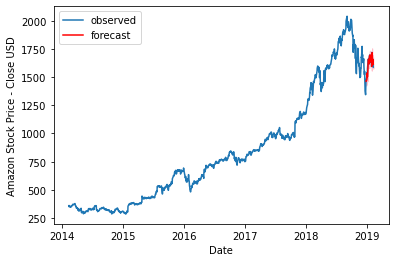

In [40]:
# plot the amazon data
plt.plot(df_amz.index, df_amz.values, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast.values, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(mean_forecast.index, lower_limits,
        upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

### Generating dynamic forecasts
Now lets move a little further into the future, to dynamic predictions. What if you wanted to predict the Amazon stock price, not just for tomorrow, but for next week or next month? This is where dynamical predictions come in.

Remember that in the video you learned how it is more difficult to make precise long-term forecasts because the shock terms add up. The further into the future the predictions go, the more uncertain. This is especially true with stock data and so you will likely find that your predictions in this exercise are not as precise as those in the last exercise.

In [42]:
# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast)

date
2018-12-27    1463.415184
2018-12-28    1465.423510
2018-12-31    1463.300885
2019-01-02    1464.956207
2019-01-03    1462.972610
2019-01-04    1464.502247
2019-01-07    1462.639754
2019-01-08    1464.052579
2019-01-09    1462.302976
2019-01-10    1463.606903
2019-01-11    1461.962550
2019-01-14    1463.164956
2019-01-15    1461.618730
2019-01-16    1462.726493
2019-01-17    1461.271752
2019-01-18    1462.291285
2019-01-22    1460.921838
2019-01-23    1461.859119
2019-01-24    1460.569193
2019-01-25    1461.429795
2019-01-28    1460.214010
2019-01-29    1461.003129
2019-01-30    1459.856467
2019-01-31    1460.578948
2019-02-01    1459.496732
2019-02-04    1460.157089
2019-02-05    1459.134959
2019-02-06    1459.737404
2019-02-07    1458.771295
2019-02-08    1459.319752
dtype: float64


### Plotting dynamic forecasts

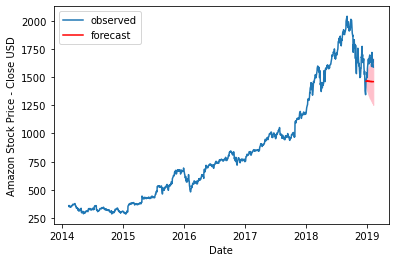

In [43]:
# plot the amazon data
plt.plot(df_amz.index, df_amz.values, label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast.values, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(mean_forecast.index, lower_limits,
        upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

### Using the ARIMA model

In [45]:
# create model
# model = SARIMAX(df, order=(2,1,1))
# fit model
# model.fit()
# make forecast
# mean_forecast = results.get_forecast(steps=10).predicted_mean

### Differencing and fitting ARMA
In this exercise you will fit an ARMA model to the Amazon stocks dataset. As you saw before, this is a non-stationary dataset. You will use differencing to make it stationary so that you can fit an ARMA model.

In the next section you'll make a forecast of the differences and use this to forecast the actual values.

The Amazon stock time series in available in your environment as amazon. The SARIMAX model class is also available in your environment.

In [47]:
# Take the first difference of the data
amazon_diff = df_amz.diff().dropna()

# Create ARMA(2,2) model
arma = SARIMAX(amazon_diff, order=(2,0,2))
# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -5531.493
Date:                Wed, 23 Mar 2022   AIC                          11072.985
Time:                        10:37:17   BIC                          11098.672
Sample:                             0   HQIC                         11082.639
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8582      0.018     47.466      0.000       0.823       0.894
ar.L2         -0.9631      0.018    -52.499      0.000      -0.999      -0.927
ma.L1         -0.8637      0.023    -37.595      0.0

### Unrolling ARMA forecast
Now you will use the model that you trained in the previous exercise arma in order to forecast the absolute value of the Amazon stocks dataset. Remember that sometimes predicting the difference could be enough; will the stocks go up, or down; but sometimes the absolute value is key.

The results object from the model you trained in the last exercise is available in your environment as arma_results. The np.cumsum() function and the original DataFrame amazon are also available.

In [50]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + df_amz.iloc[-1,0]

# Print forecast
print(arma_value_forecast)

1258    1586.232068
1259    1580.260797
1260    1577.050666
1261    1580.046471
1262    1585.709141
1263    1587.683765
1264    1583.924829
1265    1578.797114
1266    1578.016556
1267    1582.285060
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


### Fitting an ARIMA model

In [51]:
# Create ARIMA(2,1,2) model
arima = SARIMAX(df_amz, order=(2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1259    1586.237794
1260    1580.273455
1261    1577.063514
1262    1580.052375
1263    1585.708770
1264    1587.684994
1265    1583.933862
1266    1578.811346
1267    1578.027399
1268    1582.287659
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


### Implementation ACF, PACF
* If the ACF values are high and tail off very very slowly this is a sign that the data is non-stationarity, so it needs to be differenced.
* If the autocorrelation at lag-1 is very negative this is a sign that we have taken the difference too many times.

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [53]:
# create figure
#fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
# make ACF plot
#plot_acf(df, lags=10, zero=False, ax=ax1)
# make PACF plot
#plot_pacf(df, lags=10, zero=False, ax=ax2)

#plt.show()

### Order of earthquakes

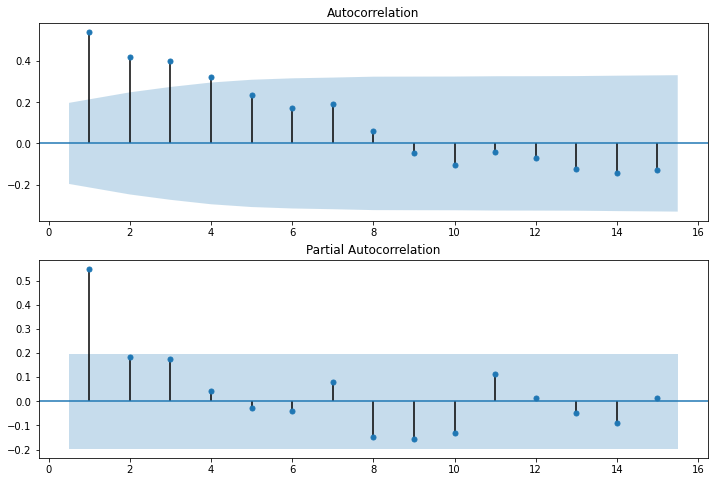

In [56]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(df_eq, lags=15, zero=False, ax=ax1)
plot_pacf(df_eq, lags=15, zero=False, ax=ax2)

# Show plot
plt.show()

In [ ]:
# AR(1)

# Instantiate model
model = SARIMAX(df_eq, order=(1,0,0))

# Train model
results = model.fit()

### AIC, BIC
### Searching over model order
In this exercise you are faced with a dataset which appears to be an ARMA model. You can see the ACF and PACF in the plot below. In order to choose the best order for this model you are going to have to do a search over lots of potential model orders to find the best set.

In [ ]:
# # Create empty list to store search results
# order_aic_bic=[]

# # Loop over p values from 0-2
# for p in range(3):
#   # Loop over q values from 0-2
#     for q in range(3):
#       	# create and fit ARMA(p,q) model
#         model = SARIMAX(df, order=(p,0,q))
#         results = model.fit()
        
#         # Append order and results tuple
#         order_aic_bic.append((p,q,results.aic,results.bic))

### Choosing order with AIC and BIC

In [ ]:
# # Construct DataFrame from order_aic_bic
# order_df = pd.DataFrame(order_aic_bic, 
#                         columns=['p', 'q', 'AIC', 'BIC'])

# # Print order_df in order of increasing AIC
# print(order_df.sort_values('AIC'))

# # Print order_df in order of increasing BIC
# print(order_df.sort_values('BIC'))

### AIC and BIC vs ACF and PACF
In this exercise you will apply an AIC-BIC order search for the earthquakes time series. In the last lesson you decided that this dataset looked like an AR(1) process. You will do a grid search over parameters to see if you get the same results. The ACF and PACF plots for this dataset are shown below.

In [58]:
# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
      
        try:
            # create and fit ARMA(p,q) model
            model = SARIMAX(df_eq, order=(p,0,q))
            results = model.fit()
            
            # Print order and results
            print(p, q, results.aic, results.bic)
            
        except:
            print(p, q, None, None)     

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No f

0 0 888.4297722924081 891.0248921425426
0 1 799.6741727812143 804.8644124814836
0 2 761.0674787503891 768.8528383007929
1 0 666.6455255036562 671.8357652039255


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No f

1 1 647.1322999653448 654.9176595157486
1 2 648.7385664590032 659.1190458595415
2 0 656.0283744154646 663.8137339658683


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.

2 1 648.8428399260508 659.2233193265891
2 2 648.8506443552745 661.8262436059475


### Mean absolute error

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


4.755622568847827


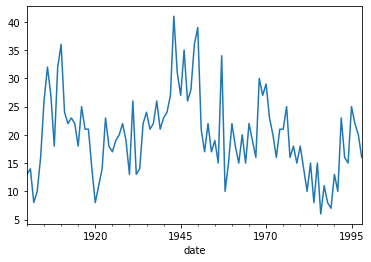

In [60]:
# Fit model
model = SARIMAX(df_eq, order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
df_eq.plot()
plt.show()

### Identification

In [ ]:
# # Plot time series
# savings.plot()
# plt.show()

# # Run Dicky-Fuller test
# result = adfuller(savings['savings'])

# # Print test statistic
# print(result[0])

# # Print p-value
# print(result[1])

### Identification II

In [ ]:
# # Create figure
# fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# # Plot the ACF of savings on ax1
# plot_acf(savings, lags=10, zero=False, ax=ax1)

# # Plot the PACF of savings on ax2
# plot_pacf(savings, lags=10, zero=False, ax=ax2)

# plt.show()

### Estimation

In [ ]:
# # Loop over p values from 0-3
# for p in range(4):
  
#   # Loop over q values from 0-3
#     for q in range(4):
#       try:
#         # Create and fit ARMA(p,q) model
#         model = SARIMAX(savings, order=(p,0,q), trend='c')
#         results = model.fit()
        
#         # Print p, q, AIC, BIC
#         print(p, q, results.aic, results.bic)
        
#       except:
#         print(p, q, None, None)

### Diagnostics

In [ ]:
# # Create and fit model
# model = SARIMAX(df, order=(1,1,1))
# results=model.fit()

# # Create the 4 diagostics plots
# results.plot_diagnostics()
# plt.show()
# print(results.summary())

### Seasonal decomposition using statsmodels

In [61]:
# import
from statsmodels.tsa.seasonal import seasonal_decompose

In [62]:
# decompose data
# decomp_results = seasonal_decompose(df['IPG3113N'], period=12)

In [ ]:
# type(decomp_results)

In [63]:
# Plot decomposed data
# decomp_results.plot()
# plt.show()

### Finding seasonal period using ACF

### Detrending time series

In [65]:
# subtract long rolling average over N steps
#df = df - df.rolling(N).mean()
# Drop NaN values
#df = df.dropna()

### Identifying seasonal data using ACF

In [ ]:
# # create figure
# fig, ax = plt.subplots(1,1, figsize=(8,4))

# # plot ACF
# plot_acf(df.dropna(), ax=ax, lags=25, zero=False)
# plt.show()

### Decompose milk production data

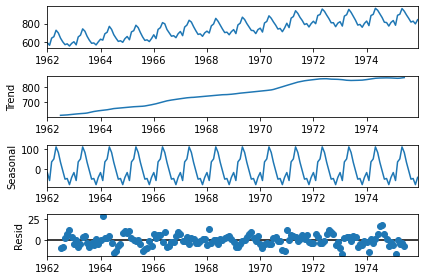

In [67]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df_mk, 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

### Fitting a SARIMA model

In [ ]:
# # imports
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# # initiate model
# model = SARIMAX(df, order=(p,d,q), seasonal_order=(P,D,Q,S))
# # fit model
# results = model.fit()

### Seasonal differencing

In [ ]:
# Take the seasonal difference
# df_diff = df.diff(S)

### Searching over model orders

In [ ]:
# import pmdarima as pm
# results = pm.auto_arima(df)

### Non-seasonal search parameters

In [ ]:
# results = pm.auto_arima( df,         # data
#                          d=0,        # non-seasonal difference order
#                          start_p=1,  # initial guess for p
#                          start_q=1,  # initial guess for q
#                          max_p=3,    # max value of p to test
#                          max_q=3,    # max value of q to test
#                          seasonal=True, # is the time series seasonal
#                          m=7,       # the seasonal period
#                          D=1,       # seasonal difference order
#                          start_P=1,
#                          start_Q=1,
#                          max_P=2,
#                          max_Q=2,
#                          information_criterion='aic',  # used to select best model
#                          trace=True,  #print results whilst training
#                          error_action='ignore',    # ignore orders that don't work
#                          stepwise=True,   # apply intelligent order search
#                        )

### Saving model objects

In [68]:
# import 
import joblib

In [ ]:
# # select a filepath
# filepath = 'localpath/great_model.pkl'
# # save model to filepath
# joblib.dump(model_results_object, filepath)

In [ ]:
# # load model object from filepath 
# model_results_object = joblib.load(filepath)

### Updating model

In [ ]:
# # Add newe observations and update parameters
# model_results_object.update(df_new)

### SARIMA model diagnostics

In [71]:
# Import model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create model object
model = SARIMAX(co2, 
                order=(1, 1, 1), 
                seasonal_order=(0, 1, 1, 12), 
                trend='c')
# Fit model
results = model.fit()
print (results.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                            CO2_ppm   No. Observations:                  727
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -179.718
Date:                            Wed, 23 Mar 2022   AIC                            369.437
Time:                                    16:43:53   BIC                            392.291
Sample:                                03-01-1958   HQIC                           378.263
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.001      2.805      0.005       0.001       0.003
ar.L1          0.2413      0.078   

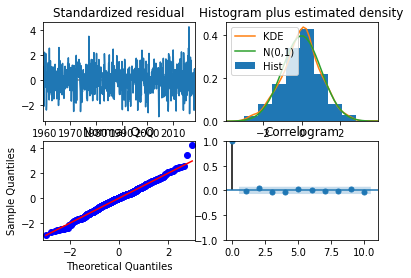

In [73]:
# Plot common diagnostics
results.plot_diagnostics()
plt.show()

In [74]:
# Create forecast object
forecast_object = results.get_forecast(steps=136)

# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

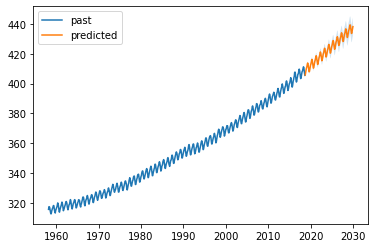

In [75]:
plt.figure()

# Plot past CO2 levels
plt.plot(co2.index, co2, label='past')

# Plot the prediction means as line
plt.plot(mean.index, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.iloc[:,0],
        conf_int.iloc[:,1], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

In [76]:
# Print last predicted mean
print(mean.iloc[-1])

# Print last confidence interval
print(conf_int.iloc[-1])

438.19421978383514
lower CO2_ppm    432.111699
upper CO2_ppm    444.276741
Name: 2030-01-01 00:00:00, dtype: float64
